### Import Libraries

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
SEED_VALUE = 42

np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

### Load the Dataset

In [ ]:
# Load the Boston housing dataset.
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape)
print("\n")
print("Input features: ", X_train[0])
print("\n")
print("Output target: ", y_train[0])

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(404, 13)


Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


### Extract Features from the Dataset

In [ ]:
boston_features = {
    'Average Number of Rooms':5,
}

X_train_1d = X_train[:, boston_features['Average Number of Rooms']]
print(X_train_1d.shape)

X_test_1d = X_test[:, boston_features['Average Number of Rooms']]

(404,)


### Plot the Features

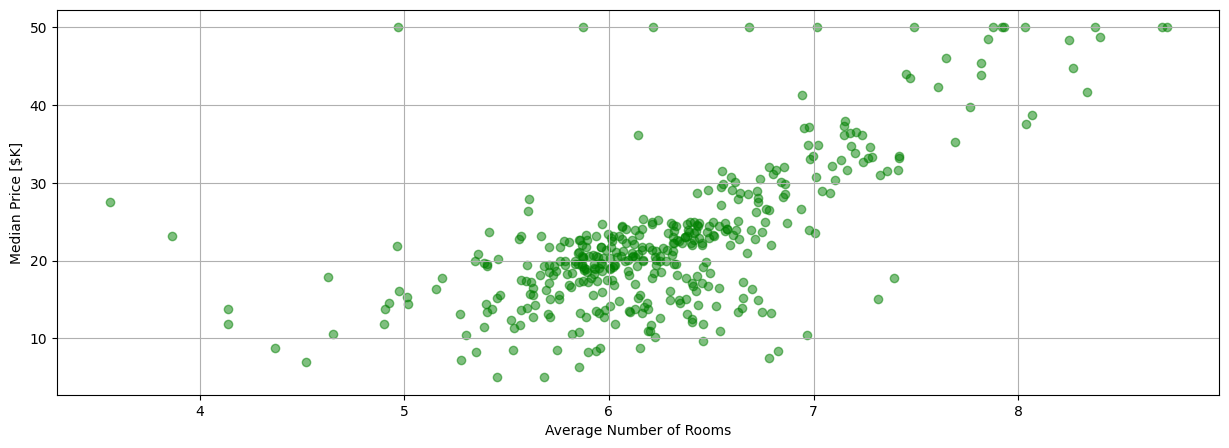

In [ ]:
plt.figure(figsize=(15,5))

plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Price [$K]')
plt.grid('on')
plt.scatter(X_train_1d[:], y_train, color='green', alpha=0.5);

### Define Keras Model

In [ ]:
model = Sequential()

model.add(Dense(1, input_shape=(1,)))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

### Compile the Model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.005),loss='mse') # Use learning_rate instead of lr

### Train the Model

In [ ]:
history = model.fit(X_train_1d,
                    y_train,
                    batch_size=16,
                    epochs=101,
                    validation_split=0.3)

Epoch 1/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 163.7187 - val_loss: 236.0253
Epoch 2/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 151.0729 - val_loss: 220.8352
Epoch 3/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 139.2247 - val_loss: 206.4757
Epoch 4/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 128.1703 - val_loss: 192.9448
Epoch 5/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 117.9050 - val_loss: 180.2400
Epoch 6/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 108.4235 - val_loss: 168.3584
Epoch 7/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 99.7193 - val_loss: 157.2966
Epoch 8/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 91.7849 - val_loss: 147.0505
Epoch 9/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84.6109 - val_loss: 137.6151
Epoch 10/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.1859 - val_loss: 128.9841
Epoch 11/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 72.4959 - val_loss: 121.1496
Epoch 12/101
18/18 ━━━━

### Plot Training Results

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

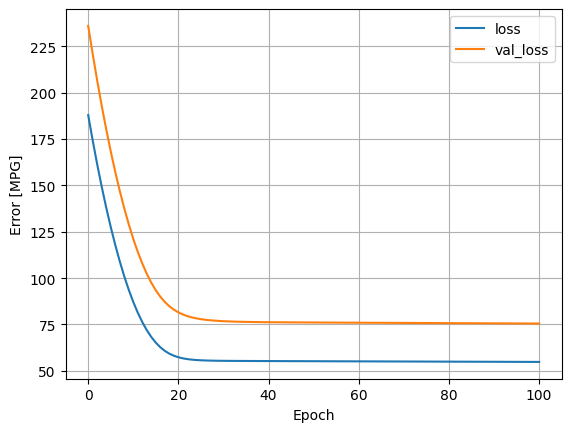

In [ ]:
plot_loss(history)

### Make Prediction using the model

In [ ]:
x = np.array([3, 4, 5, 6, 7])
y_pred = model.predict(x)
for idx in range(len(x)):
    print("Predicted price of a home with {} rooms: ${}K".format(x[idx], int(y_pred[idx]*10)/10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted price of a home with 3 rooms: $11.5K
Predicted price of a home with 4 rooms: $14.8K
Predicted price of a home with 5 rooms: $18.0K
Predicted price of a home with 6 rooms: $21.3K
Predicted price of a home with 7 rooms: $24.6K


<ipython-input-19-7ac7157983e7>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted price of a home with {} rooms: ${}K".format(x[idx], int(y_pred[idx]*10)/10))


### Plot the model and Data

In [ ]:
x = tf.linspace(3,9,10)
y=model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [ ]:
def plot_data(x_data, y_data, x, y, title=None):
    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

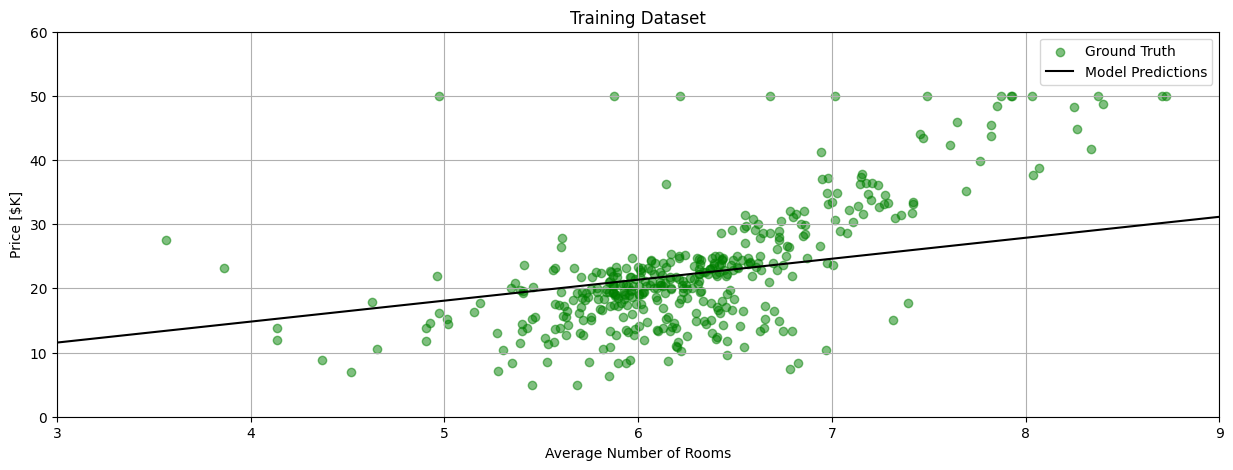

In [ ]:
	plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

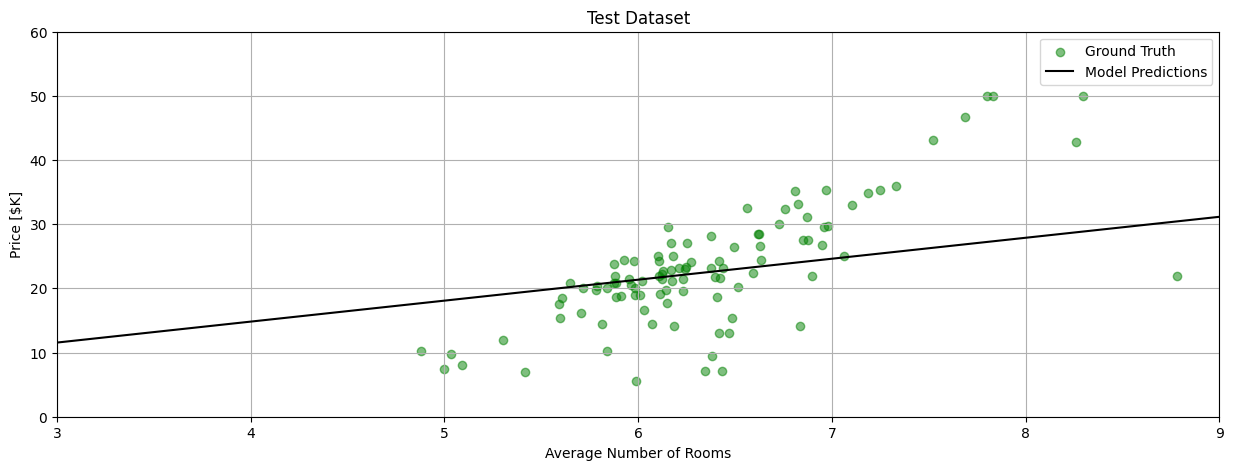

In [ ]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')